In [1]:
# KL: Kullback–Leibler divergence
# https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from scipy.stats import poisson

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
p = [0.10, 0.41, 0, 0.334]
q = [0.11, 0.45, 0.12, 0.345]

<center>
    Kullback–Leibler divergence
</center>

<!-- https://www.scaler.com/topics/how-to-center-an-image-in-html/ -->
<!-- https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence -->

<div style="text-align:center; background:white">
    <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/6f0eac7cbb78f51d788184ca805cedd7c23e9429'>
</div>

In [4]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [5]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

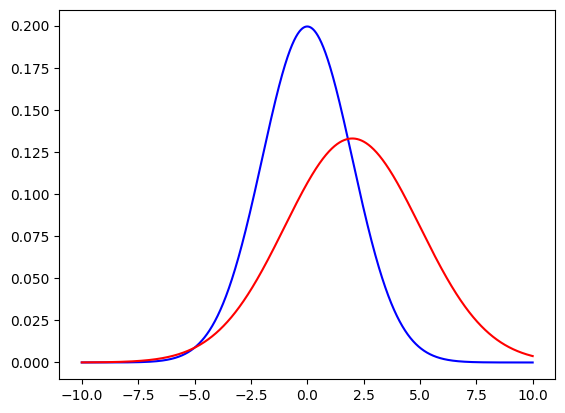

In [6]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [7]:
kl(p, q)

349.91348337868124

In [8]:
kl(q, p)

680.5187626314441

In [9]:
kl(p, q) == kl (q, p)

False

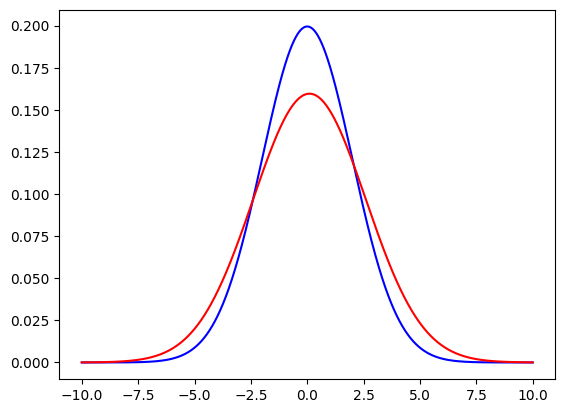

In [10]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [11]:
kl(p, q)

43.94620233653506

In [12]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

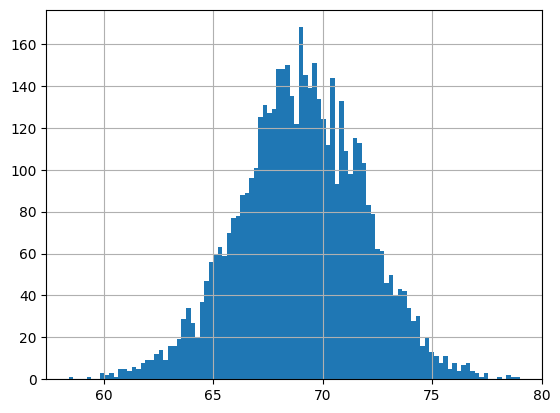

In [14]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [15]:
males

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
4995    68.860062
4996    68.973423
4997    67.013795
4998    71.557718
4999    70.351880
Name: Height, Length: 5000, dtype: float64

In [16]:
males.describe()

count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64

In [17]:
males.describe()['mean']

69.02634590621741

In [18]:
males.describe()['std']

2.863362228660647

In [19]:
# count is all frequencies
# devision is middle of all bins
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [20]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(ideal)

[69.0256356  67.97514421 67.70419791 ... 71.21758895 70.05795425
 61.97574323]


In [21]:
icount, idevision = np.histogram(ideal, bins=100)
print(icount)
print(idevision)

[  1   0   0   0   1   0   0   1   0   2   3   1   1   6   5   6   4   5
   7  12  13  14  15  24  24  24  30  28  38  37  49  61  58  53  63  61
  90  81  94  95 107 124 102 119 124 130 155 152 126 148 170 124 146 142
 138 114 180 104 124 127  97 125 124  85  86 103  64  72  77  60  65  48
  53  31  46  23  25  22  22  17  10  13  12  10   4   6   6   9   6   3
   3   2   2   2   1   1   0   0   1   1]
[58.25578391 58.46512648 58.67446905 58.88381161 59.09315418 59.30249675
 59.51183932 59.72118188 59.93052445 60.13986702 60.34920959 60.55855215
 60.76789472 60.97723729 61.18657985 61.39592242 61.60526499 61.81460756
 62.02395012 62.23329269 62.44263526 62.65197783 62.86132039 63.07066296
 63.28000553 63.48934809 63.69869066 63.90803323 64.1173758  64.32671836
 64.53606093 64.7454035  64.95474607 65.16408863 65.3734312  65.58277377
 65.79211633 66.0014589  66.21080147 66.42014404 66.6294866  66.83882917
 67.04817174 67.25751431 67.46685687 67.67619944 67.88554201 68.09488457
 68.30422

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   3.,
          1.,   1.,   6.,   5.,   6.,   4.,   5.,   7.,  12.,  13.,  14.,
         15.,  24.,  24.,  24.,  30.,  28.,  38.,  37.,  49.,  61.,  58.,
         53.,  63.,  61.,  90.,  81.,  94.,  95., 107., 124., 102., 119.,
        124., 130., 155., 152., 126., 148., 170., 124., 146., 142., 138.,
        114., 180., 104., 124., 127.,  97., 125., 124.,  85.,  86., 103.,
         64.,  72.,  77.,  60.,  65.,  48.,  53.,  31.,  46.,  23.,  25.,
         22.,  22.,  17.,  10.,  13.,  12.,  10.,   4.,   6.,   6.,   9.,
          6.,   3.,   3.,   2.,   2.,   2.,   1.,   1.,   0.,   0.,   1.,
          1.]),
 array([58.25578391, 58.46512648, 58.67446905, 58.88381161, 59.09315418,
        59.30249675, 59.51183932, 59.72118188, 59.93052445, 60.13986702,
        60.34920959, 60.55855215, 60.76789472, 60.97723729, 61.18657985,
        61.39592242, 61.60526499, 61.81460756, 62.02395012, 62.23329269,
        62.44263526, 62.65

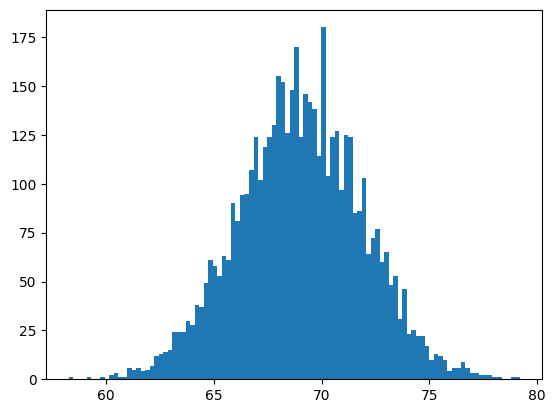

In [22]:
plt.hist(ideal, bins=100)

In [23]:
kl(count, icount)

C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


106.49457302820521

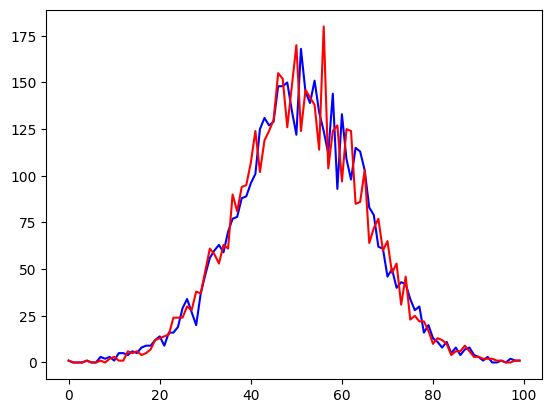

In [24]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [25]:
# count of males
sum(count)

5000

In [26]:
# probabilistic frequency
probabilistic_count = count / sum(count)

In [27]:
probabilistic_icount = icount / sum(icount)

In [28]:
kl(probabilistic_count, probabilistic_icount)

C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Sadra\AppData\Local\Temp\ipykernel_2204\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


0.02129891460564102